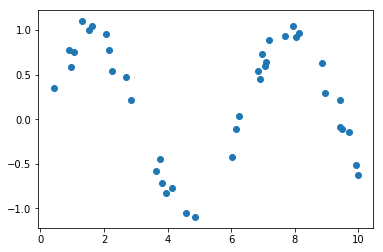

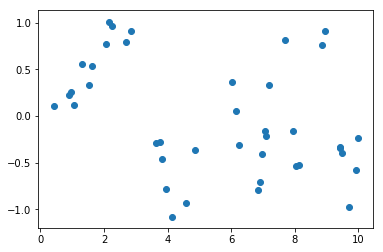

In [23]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Predicting functions of spatial dimensions - Big Idea - relative certainties
def func1(x):
    return np.sin(x) + np.random.normal(0, .1)

def func2(x):
    return np.sin(x**2/4) + np.random.normal(0, .1)

inputs = np.random.uniform(low=0, high=10, size=40)
outputs1 = np.array([func1(x) for x in inputs])
outputs2 = np.array([func2(x) for x in inputs])

inputs, outputs1, outputs2 = inputs.reshape(-1, 1), outputs1.reshape(-1, 1), outputs2.reshape(-1, 1)

plt.scatter(inputs, outputs1)
plt.show()
plt.scatter(inputs, outputs2)
plt.show()

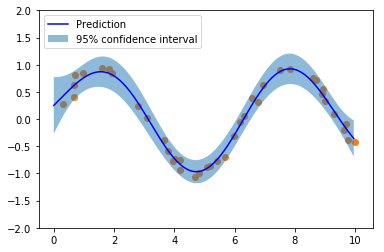

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
kernel = RBF()
gp = GaussianProcessRegressor(kernel = kernel, alpha=.1) # alpha is an initial noise estimate
gp.fit(inputs, outputs1)
xvals = np.arange(0, 10, .05).reshape(-1, 1)
y_pred, sigma = gp.predict(xvals, return_std=True)
#print(y_pred.shape)
#print(sigma.shape)
plt.plot(xvals, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([xvals[:,0], xvals[::-1,0]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
         alpha=.5, label='95% confidence interval')
plt.scatter(inputs, outputs1)
plt.ylim(-2, 2)
plt.legend(loc='upper left')
plt.show()

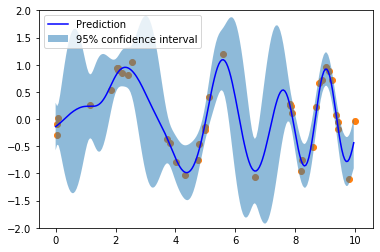

In [47]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel = kernel, alpha=.1) # alpha is an initial noise estimate
gp.fit(inputs, outputs2)
xvals = np.arange(0, 10, .05).reshape(-1, 1)
y_pred, sigma = gp.predict(xvals, return_std=True)
#print(y_pred.shape)
#print(sigma.shape)
plt.plot(xvals, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([xvals[:,0], xvals[::-1,0]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
         alpha=.5, label='95% confidence interval')
plt.ylim(-2, 2)
plt.scatter(inputs, outputs2)
plt.legend(loc='upper left')
plt.show()

In [51]:
def run_gpr(true_function, num_points=40, alpha=0.1, plot=True):
    inputs = np.random.uniform(low=0, high=10, size=num_points)
    outputs = true_function(inputs)
    
    kernel = RBF()
    gp = GaussianProcessRegressor(kernel = kernel, alpha=alpha) # alpha is an initial noise estimate
    gp.fit(inputs.reshape(-1, 1), outputs.reshape(-1, 1))
    x_eval = np.arange(0, 10, .05)
    
    y_pred, sigma = gp.predict(x_eval.reshape(-1, 1), return_std=True)
    
    y_eval = true_function(x_eval)
    
    rms_error = np.sum(np.sqrt((y_eval-y_pred[:,0])**2)) / len(y_eval)
    
    if plot:
        plt.plot(x_eval, y_pred, 'b-', label='Prediction')
        plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
                 np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
                 alpha=.5, label='95% confidence interval')
        plt.ylim(-2, 2)
        plt.scatter(inputs, outputs)
        plt.legend(loc='upper left')
        plt.show()
    
    return rms_error
    
    

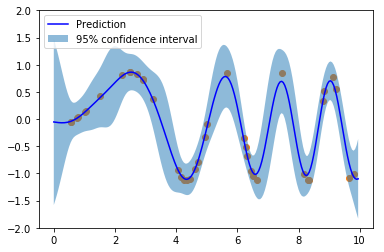

0.24553410620054378

In [62]:
run_gpr(func2, 40, 0.1)

In [57]:
rms_errors = []

num_points = np.arange(5,200,5)

for n in num_points:
    rms = run_gpr(func2, n, alpha=0.1, plot=False)
    rms_errors.append(rms)

Text(0, 0.5, 'RMS error')

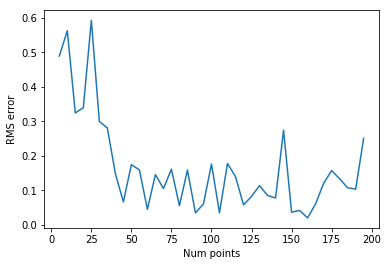

In [59]:
plt.figure()
plt.plot(num_points, rms_errors)
plt.xlabel('Num points')
plt.ylabel('RMS error')

In [60]:
rms_errors = []

alphas = np.linspace(0.01, 1, 100)

for a in alphas:
    rms = run_gpr(func2, 40, alpha=a, plot=False)
    rms_errors.append(rms)

Text(0, 0.5, 'RMS error')

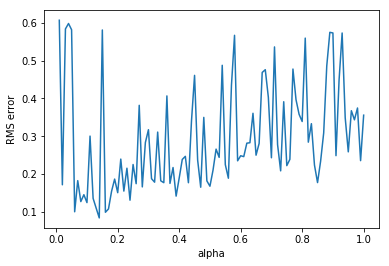

In [61]:
plt.figure()
plt.plot(alphas, rms_errors)
plt.xlabel('alpha')
plt.ylabel('RMS error')

In [66]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

def run_rbfwhite(true_function, num_points=40, alpha=0.1, plot=True):
    inputs = np.random.uniform(low=0, high=10, size=num_points)
    outputs = true_function(inputs)
    
    kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
        + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
    
    gp = GaussianProcessRegressor(kernel = kernel, alpha=alpha) # alpha is an initial noise estimate
    gp.fit(inputs.reshape(-1, 1), outputs.reshape(-1, 1))
    x_eval = np.arange(0, 10, .05)
    
    y_pred, sigma = gp.predict(x_eval.reshape(-1, 1), return_std=True)
    
    y_eval = true_function(x_eval)
    
    rms_error = np.sum(np.sqrt((y_eval-y_pred[:,0])**2)) / len(y_eval)
    
    if plot:
        plt.plot(x_eval, y_pred, 'b-', label='Prediction')
        plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
                 np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
                 alpha=.5, label='95% confidence interval')
        plt.ylim(-2, 2)
        plt.scatter(inputs, outputs)
        plt.legend(loc='upper left')
        plt.show()
    
    return rms_error

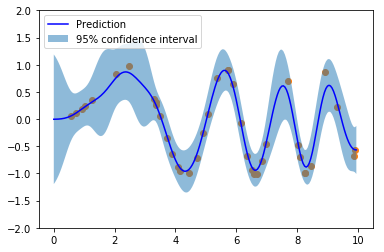

0.11151130750943318

In [67]:
run_rbfwhite(func2, 40, 0.1)

In [68]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

def run_manualoakernel(true_function, num_points=40, alpha=0.1, plot=True):
    inputs = np.random.uniform(low=0, high=10, size=num_points)
    outputs = true_function(inputs)
    
    # Kernel with parameters given in GPML book
    k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
    k2 = 2.4**2 * RBF(length_scale=90.0) \
        * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
    # medium term irregularity
    k3 = 0.66**2 \
        * RationalQuadratic(length_scale=1.2, alpha=0.78)
    k4 = 0.18**2 * RBF(length_scale=0.134) \
        + WhiteKernel(noise_level=0.19**2)  # noise terms
    kernel = k1 + k2 + k3 + k4
    
    
    gp = GaussianProcessRegressor(kernel = kernel, alpha=alpha) # alpha is an initial noise estimate
    gp.fit(inputs.reshape(-1, 1), outputs.reshape(-1, 1))
    x_eval = np.arange(0, 10, .05)
    
    y_pred, sigma = gp.predict(x_eval.reshape(-1, 1), return_std=True)
    
    y_eval = true_function(x_eval)
    
    rms_error = np.sum(np.sqrt((y_eval-y_pred[:,0])**2)) / len(y_eval)
    
    if plot:
        plt.plot(x_eval, y_pred, 'b-', label='Prediction')
        plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
                 np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
                 alpha=.5, label='95% confidence interval')
        plt.ylim(-2, 2)
        plt.scatter(inputs, outputs)
        plt.legend(loc='upper left')
        plt.show()
    
    return rms_error

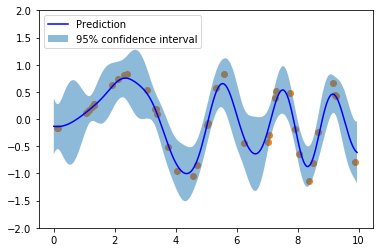

0.25650792836562547

In [69]:
run_manualoakernel(func2, 40, 0.1)

# Assignment
1. Plot performance of the Gaussian Process vs. the Number of Points
2. Plot performance of the Gaussian Process vs. the Noise Parameter

# Stretch Goals
- There are other kernels available in sklearn. Try RBF + White Kernel. Try other combinations of kernels available at [scikit-learn.org](https://scikit-learn.org/stable/modules/classes.html). (CTRL+F for gaussian process)